# Part 6: Model Validation and Selection

https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html 

## cross validation techniques

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [12]:
df = pd.read_csv("energy_consumption.csv")
columns=['NSM', 'T8', 'RH_8', 'T2', 'RH_9', 'RH_7', 'RH_1', 'RH_2', 'RH_3']
x = pd.DataFrame(df,columns=columns)
y = df['Appliances']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=0)
x_train.shape

(9867, 9)

In [22]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import LeaveOneOut
cross_val_score(model,x_train,y_train,cv=LeaveOneOut(len(x_train)))

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0.

#### some help functions

In [11]:
def mean_absolute_percentage_error(y_true, y_pred):
    
    # calculates mean absolute error of the true and predicted values
    
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    count = 0
    sum = 0
    for a,p in zip(y_true, y_pred):
        if(a != 0):
            sum += (abs(a-p)/a)
            count += 1
        return (sum/count)*100
    

In [10]:
def plotMetrics(y_test, y_pred, title, samples):

    # plots the true and predicted values and prints RMS, MAE and MAPE metrics
    
    plt.scatter(y_pred[0:samples],y_test.values[0:samples])
    plt.title('True vs Pred values - %s' % title)
    plt.xlabel('Predictions')
    plt.ylabel('True')
    plt.show()
    
    RMS = np.sqrt(mean_squared_error(y_test,y_pred, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error:", MAE) 
    print("Mean Absolute Percentage Error:", MAPE)
    

In [45]:
model = RandomForestRegressor()
print(model.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


#### important hyperparameters:
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

### random Hyperparameter Grid

In [6]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.025, random_state=0)
x_train.shape

(493, 9)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). 

In [8]:
model = RandomForestRegressor()
rand_model = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)
rand_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [9]:
rand_model.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [13]:
x_train.shape

(9867, 9)

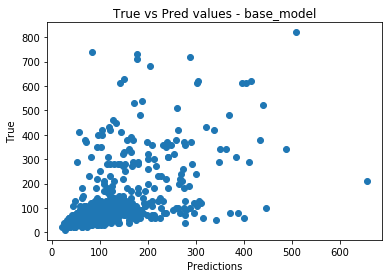

Root Mean Squared Error: [80.04029817]
Mean Absolute Error: [38.69781111]
Mean Absolute Percentage Error: 20.0


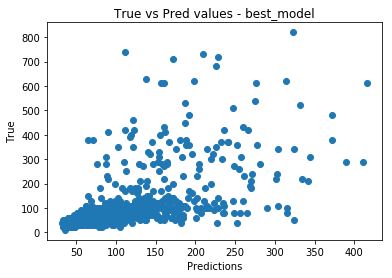

Root Mean Squared Error: [78.36217685]
Mean Absolute Error: [38.19286898]
Mean Absolute Percentage Error: 41.78950623553829


In [15]:
base_model = RandomForestRegressor(n_estimators =10, random_state=42)
base_model.fit(x_train, y_train)
base_pred = base_model.predict(x_test)
plotMetrics(y_test,base_pred,'base_model',1000)
best_model = rand_model.best_estimator_
best_model.fit(x_train,y_train)
best_pred = best_model.predict(x_test)
plotMetrics(y_test,best_pred,'best_model',1000)

#### depth is one of  the important hyperparameter

In [37]:
x_train.shape

(9867, 9)

In [38]:
y_train.shape

(9867,)

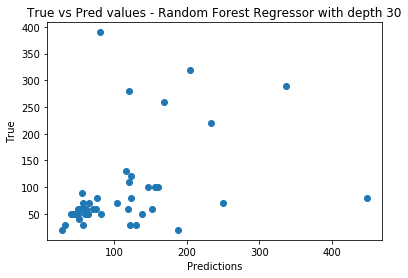

Root Mean Squared Error: [78.5813854]
Mean Absolute Error: [37.91367027]
Mean Absolute Percentage Error: 16.206896551724135


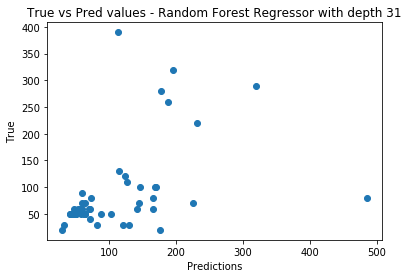

Root Mean Squared Error: [78.35663102]
Mean Absolute Error: [37.76493441]
Mean Absolute Percentage Error: 10.0


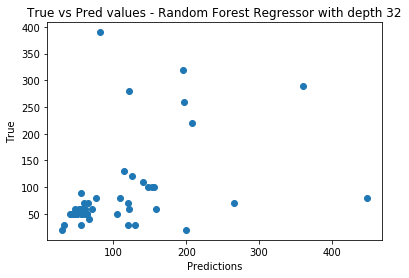

Root Mean Squared Error: [78.68717005]
Mean Absolute Error: [38.03213274]
Mean Absolute Percentage Error: 24.137931034482758


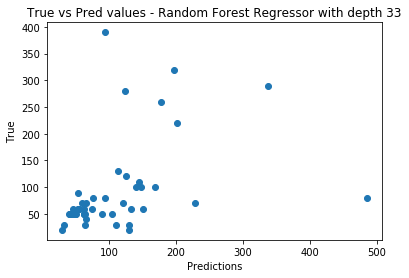

Root Mean Squared Error: [78.52719277]
Mean Absolute Error: [37.85020072]
Mean Absolute Percentage Error: 16.206896551724135


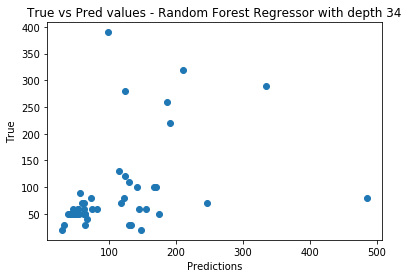

Root Mean Squared Error: [78.49895706]
Mean Absolute Error: [37.76894536]
Mean Absolute Percentage Error: 15.517241379310345


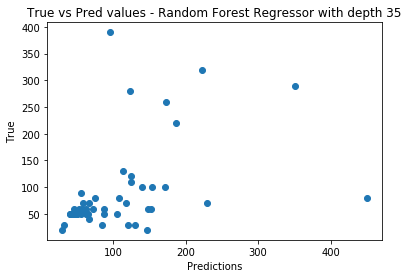

Root Mean Squared Error: [78.33768426]
Mean Absolute Error: [37.74458401]
Mean Absolute Percentage Error: 21.03448275862069


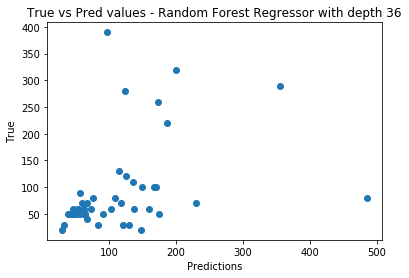

Root Mean Squared Error: [78.40951847]
Mean Absolute Error: [37.79492769]
Mean Absolute Percentage Error: 22.413793103448278


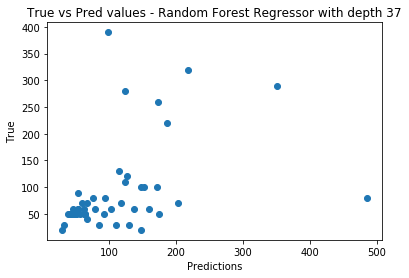

Root Mean Squared Error: [78.48088801]
Mean Absolute Error: [37.77001419]
Mean Absolute Percentage Error: 21.03448275862069


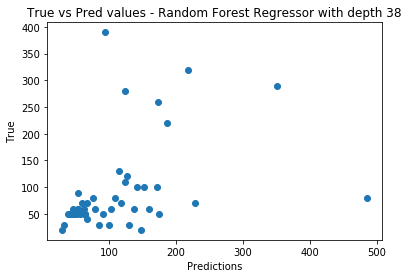

Root Mean Squared Error: [78.31364221]
Mean Absolute Error: [37.74150875]
Mean Absolute Percentage Error: 21.03448275862069


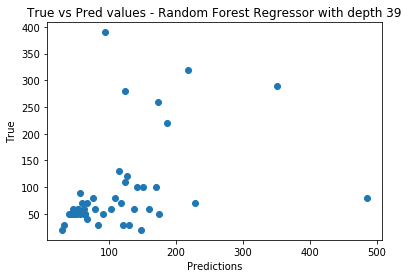

Root Mean Squared Error: [78.33935745]
Mean Absolute Error: [37.70956627]
Mean Absolute Percentage Error: 21.03448275862069


In [19]:
depths = range(30,40)
for i in depths:
    #build model
    model = RandomForestRegressor(max_depth=i, random_state=0)
    #train model
    model = model.fit(x_train, y_train.values.ravel())
    feature_importance = model.feature_importances_
    # coefficient of determination
    R2 = model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    model_metrics = plotMetrics(y_test, 
                                y_pred,
                                'Random Forest Regressor with depth '+str(i), 
                                50)

**After depth 35, there isn't much change in the accuracy or the True vs Predicted plot.**

## Grid Search with Cross Validation

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=0)
x_train.shape

(9867, 9)

In [26]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [35],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  6.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [35], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [27]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

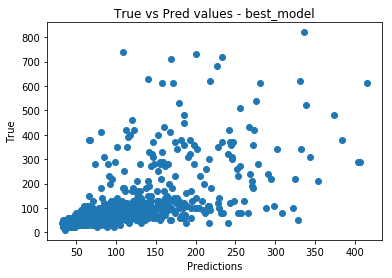

Root Mean Squared Error: [78.26696905]
Mean Absolute Error: [38.10722559]
Mean Absolute Percentage Error: 40.28900382822789


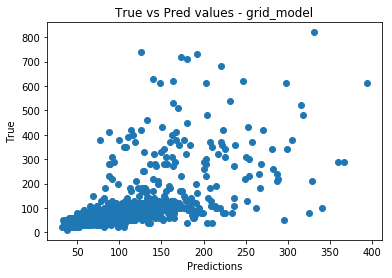

Root Mean Squared Error: [78.47287248]
Mean Absolute Error: [38.50153518]
Mean Absolute Percentage Error: 24.007237584737773


In [30]:
best_model = rand_model.best_estimator_.fit(x_train,y_train)
best_pred = best_model.predict(x_test)
plotMetrics(y_test,best_pred,'best_model',1000)

grid_model =grid_search.best_estimator_.fit(x_train,y_train)
grid_pred = grid_model.predict(x_test)
plotMetrics(y_test,grid_pred,'grid_model',1000)

## Learning curves - low bias and high variance

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=0)
x_train.shape

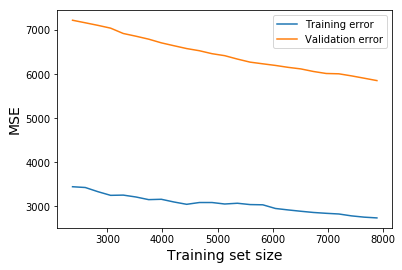

In [31]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, validation_scores=learning_curve(grid_search.best_estimator_, 
                                                             x_train, y_train, cv = 5, 
                                                             scoring = 'neg_mean_squared_error', 
                                                             train_sizes=np.linspace(0.3,1,25))
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.legend()


In [7]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

## Regulalarization techniques

In [16]:
model = RandomForestRegressor(oob_score=True)

In [17]:
model.oob_score

True

In [18]:
df = pd.read_csv("energy_consumption.csv")
columns=['NSM', 'T8', 'RH_8', 'T2', 'RH_9', 'RH_7', 'RH_1', 'RH_2', 'RH_3']
x = pd.DataFrame(df,columns=columns)
y = df['Appliances']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.05, random_state=0)
x_train.shape

(986, 9)

#### oob_score:
This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

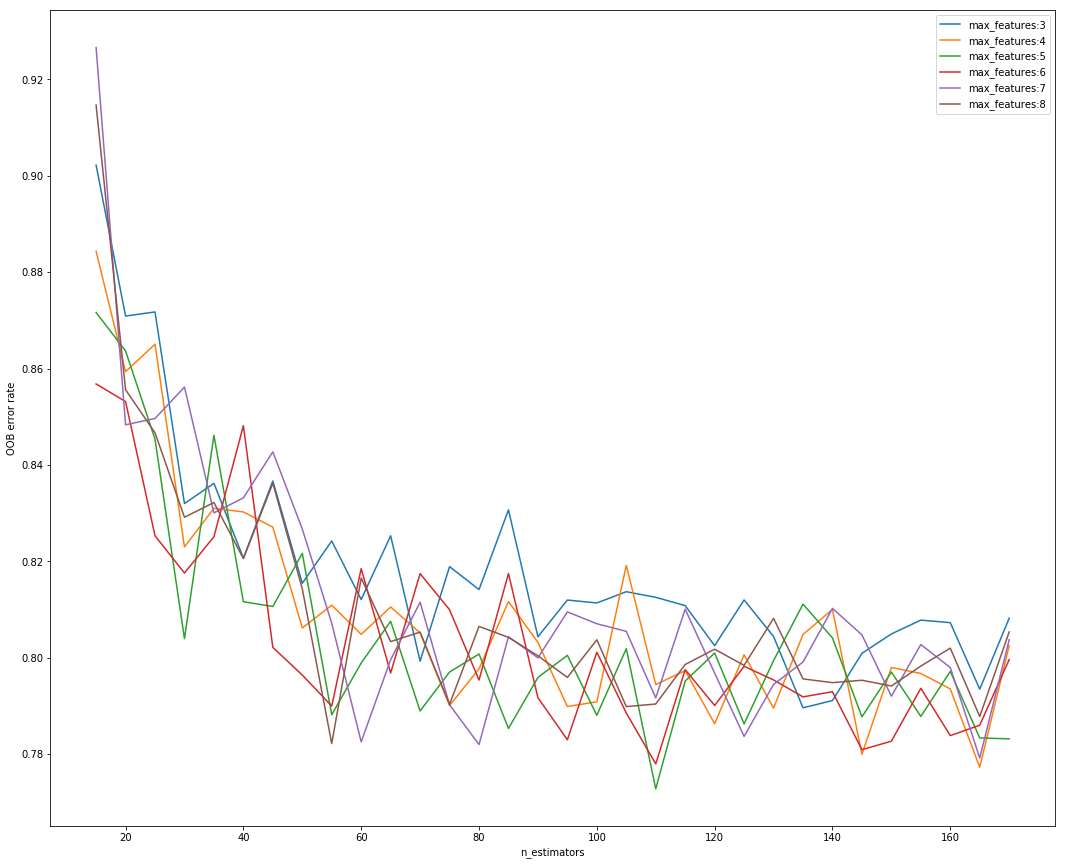

In [69]:

n_estimators = range(15,175,5)
max_features = range(3,9)
fig=plt.figure(figsize=(18,15))
for i in max_features:
    oob_scores=[]
    for j in n_estimators:
        model = RandomForestRegressor(bootstrap= True,
                                      max_depth= 35,
                                      max_features= i,
                                      min_samples_leaf=3,
                                      min_samples_split=8,
                                      n_estimators=j,
                                      oob_score=True,
                                      n_jobs=-1)
        model.fit(x_train,y_train)
        oob_scores.append(1-model.oob_score_)
        
    plt.plot(n_estimators,oob_scores,label='max_features:'+str(i))
    
plt.xlabel('n_estimators')
plt.ylabel('OOB error rate')   
plt.legend()
plt.show()

##### OOB values have to be low.
Best random forest regressor params:  
 'bootstrap': True,  
 'max_depth': 35,  
 'max_features': 5,  
 'min_samples_leaf': 3,  
 'min_samples_split': 8,  
 'n_estimators': 110 